<a href="https://colab.research.google.com/github/hygjob/keras_exercise/blob/master/An_introduction_to_neural_networks_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

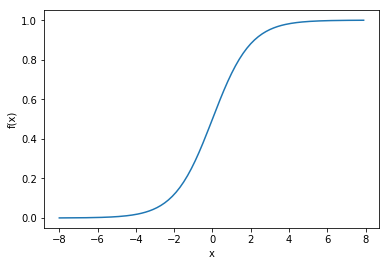

In [0]:
import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8,8, 0.1)
f = 1 / ( 1 + np.exp(-x))

plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)');
plt.show()

In [0]:
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])

w2 = np.zeros((1,3))
w2[0,:] = np.array([0.5, 0.5, 0.5])

In [0]:
w2

array([[0.5, 0.5, 0.5]])

In [0]:
wh = np.zeros((1,3))

In [0]:
wh

array([[0., 0., 0.]])

In [0]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

In [0]:
b1

array([0.8, 0.8, 0.8])

In [0]:
b2

array([0.2])

In [0]:
def f(x):
    return 1/ (1+np.exp(-x))

In [0]:
def simple_looped_nn_calc:
    pass


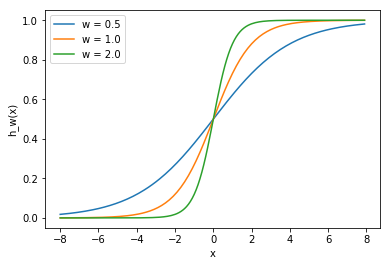

In [0]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'

for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1/ (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)

plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

(1797, 64)


<Figure size 432x288 with 0 Axes>

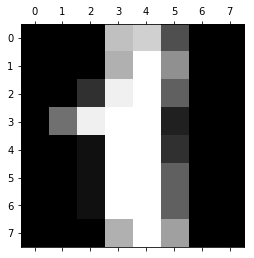

In [0]:
# 1.5 신경망 구현

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [0]:
1.5.1 데이터 스케일링

In [0]:
데이터 스케일링이 왜 필요한가? 다음에 나온 픽셀 데이터를 살펴보자.

In [0]:
digits.data[0,:]


입력 데이터의 값이 0 ~ 15 에 있다. 스케일링이라는 뜻은 입력값을 0값을 중심으로 -1에서 1사이의 값으로 바꾸는 것을 말한다. 이런 식으로 스케일링하면 신경망을 수렴시키는데 도움이 되고 다른 타입의 데이터와 연동하기 쉽다. sci-kit learn을 사용해 보자.

In [0]:
# ref code http://adventuresinmachinelearning.com/neural-networks-tutorial


In [0]:
from sklearn.preprocessing import StandardScaler


1.5.3 출력층 설정


입력한 픽셀로 우리가 찾고자 하는 값을 0~9사이에서 찾아야 한다. 알다시피 출력층의 노드는 0 ~9까지를 나타낸다.
숫자 5의 이미지가 입력으로 들어가면 결과층에서 5에 해당하는 노드가 보다 높은 확률을 나타내야 한다. 이상적으로는 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]와 같이 나타나면 될 것이다. 그렇지만 실제결과값을 보면 [0.01, 0.1, 0.2, 0.05, 0.3, 0.8, 0.4, 0.03, 0.25, 0.02] 식으로 되어 있다. 여기선 출력확률이 가장 높은 것이 예측한 숫자라고 볼 수 있다.

scikit learn에서 제공하는 MNIST를 가지고 테스트를 해 보자. 손으로 쓴 숫자값을 가지고 분류를 해 보자. 모델 구축을 위해 숫자값을 벡터로 변환하는 과정을 거쳐야 할 것이고 출력값은 10개의 차원을 가져야 한다. 즉, 입력값이 1이면 출력값은 [0, 1, 0, 0, 0, 0, 0,0, 0, 0]과 같아야 한다. 

아래 코드를 보자.

In [0]:
y_a = np.zeros((2,10))

In [0]:
y_a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
y_b = np.zeros([2,10])

In [0]:
y_b

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [0]:
y.shape

(1797,)

In [0]:
y_vect = convert_y_to_vect(y)

In [0]:
y_vect.shape

(1797, 10)

In [0]:
import numpy as np

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect




In [0]:
1.5.4 신경망구축

신경망을 구축해 보자. 이미지당 64개의 픽셀이고 이를 받기 위해 입력층은 64개의 노드로 하자. 출력층은 숫자를 예측해야 하므로 10개의 노드를 설정한다. 은닉층을 설정할 차례다. 입력층과 출력층 사이의 층을 은닉층이라고 한다. 
네트워크를 구성하기 위해 파이썬 리스트를 정해보자.

nn_structure = [64, 30 10]

In [0]:
활성화함수로 시그모이드를 쓸 것이다.


In [0]:
def f(x):
    return 1/ (1+ np.exp(-x))

In [0]:
def f_deriv(x):
    return f(x) * ( 1 - f(x))

In [0]:
for i in range(1, 5):
    print(i)

1
2
3
4


In [0]:
import numpy.random as r
def setup_and_init_weight(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

        

In [0]:
ww, bb = setup_and_init_weight(nn_structure)

In [0]:
type(b)

dict

In [0]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b


In [0]:
triww, tribb = init_tri_values(nn_structure)

In [0]:
triww

{1: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 2: array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

경사하강법을 적용하려면 먼져 피드 포워드 계산을 해야한다. 다음은 1.3.5에서 보여주었던 피드포워드 함수를 변경한 버전이다.

In [0]:
f

<function __main__.f(x)>

In [0]:
def feed_forward(x, W, b):
    h = { 1:x}
    z = {}
    for l in range(1, len(W) + 1):
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l) * h^(l) + b^(l)
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l))
        
    return h, z


In [0]:
마지막으로 역전파를 실행하여 출력층의 델타값과 은닉층의 델타값을 구한다.

In [0]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

In [0]:
def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [0]:
지금까지 작업한 것을 모아보자.

In [0]:
def train_nn(nn_structure, X, y, iter_num = 3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descnet for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 = 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
            
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values, 
            # to be used in the gradient descent step
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl - 1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                        # trwiW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                        tri_W[l] += np.dot(delta[l+1][:, np.newaxis], np.transpose(h[l][:,np.newaxis]))
                        # trib^(l) = trib^(l) + delta^(l+1)
                        tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0 / m * tri_W[l])
            b[l] += -alpha * (1.0 / m * tri_b[l])
        # complete the average cost calculation
        
        avg_cost = 1.0 / m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func
        

먼저, 특정 조건일 시 경사하강이 끝나는 별도의 설정은 하지 않았다. 대신, 특정 회수만큼 반복(3000번)하도록 하였다. 그리고 비용 함수의 평균의 진행정도를 보았다(avg_cost_func). 반복이 될면서 학습 샘플을 가지고 피드 포워드와 역전파를 진행하였다. 역전파 단계는 출력층에서 부터 거꾸로 값을 전달하는 식(range(len(nn_structure), 0, -1)로 진행을 하였다. 출력층에 다다르면 비용 평균을 계산하였다. 평균누적값 tri_W, tri_b를 각 층마다 계산하였다.

마지막으로 모든 학습 샘플로 반복을 진행한 후, tri_W, tri_b를 갱신하고, 경사하강법을 사용하여 가중치와 절편을 계산하였다.

W^(l) = W^(l) - alpha[ 1 / m * delta-W^(l) ]
b^(l) = b^(l) - alpha[ 1 / m * delta-b^(l) ]

In [0]:
과정을 반복하면 비용 평균값에 따라 가충치와 절편이 갱신되고 과정이 모두 종료되면 최종적인 가충치와 절편값이 정해진다.

In [0]:
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)

In [0]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

1.5.5 훈련된 모델의 정확도

In [0]:
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i,:], W, b)
        y [i] = np.argmax(h[n_layers])
        
    return y

In [0]:
from sklearn.metrics import accuracy_scope
y_pred = predict_y(W, b, X_test, 3)
accuracy_score(y_test, y_pred) * 100

In [0]:


# 연습
nn_structure = [64, 30, 10]


(1797, 64)


<Figure size 432x288 with 0 Axes>

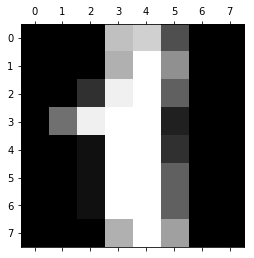

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()

In [0]:
digits.data[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

In [0]:
X[0,:]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [0]:
from sklearn.model_selection import train_test_split
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [0]:
import numpy as np
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
y_train[0], y_v_train[0]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [0]:
nn_structure = [64, 30, 10]

In [0]:
def f(x):
    return 1 / (1 + np.exp(-x))
def f_deriv(x):
    return f(x) * (1 - f(x))

In [0]:
import numpy.random as r
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [0]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [0]:
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if it is the first layer, then the input into the weights is x, otherwise, 
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)  
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l)) 
    return h, z

In [0]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [0]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values, to be used in the
            # gradient descent step
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], h[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-h[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) 
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [0]:
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


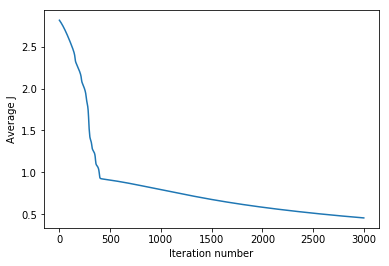

In [0]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [0]:
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

In [0]:
from sklearn.metrics import accuracy_score
y_pred = predict_y(W, b, X_test, 3)
accuracy_score(y_test, y_pred)*100

88.31710709318497